In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("train_data.csv")
dataset.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
dataset

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [4]:
dataset.describe

<bound method NDFrame.describe of            Date  Petrol (USD)
0      6/9/2003         74.59
1     6/16/2003         74.47
2     6/23/2003         74.42
3     6/30/2003         74.35
4      7/7/2003         74.28
..          ...           ...
808   12/3/2018        124.30
809  12/10/2018        122.37
810  12/17/2018        121.02
811  12/24/2018        120.61
812  12/31/2018        120.18

[813 rows x 2 columns]>

**Data Analysis and splitting the data**

In [5]:
dataset.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [6]:
df=dataset.dropna()

In [7]:
df

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [8]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

/var/folders/hn/4gxqj8455cn3djrk241lxj440000gn/T/ipykernel_32810/2042796322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


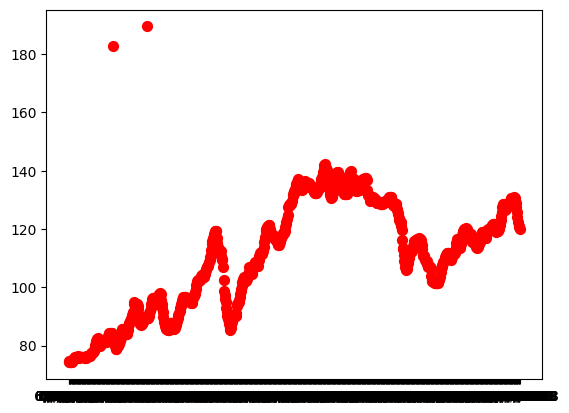

In [9]:
plt.scatter(df.Date,df.Petrol,color='red',label='Prices',s=50)

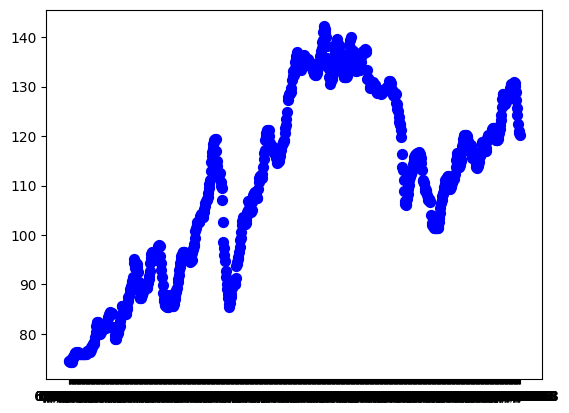

In [10]:
df2=df[df.Petrol<160]
plt.scatter(df2.Date,df2.Petrol,color='blue',label='Prices',s=50)

In [11]:
df3=df2.reset_index()['Petrol']
df3.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler # requires 2d input
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df3).reshape(-1,1)) # -1 here calculates as many rows as it requires, 1 is the number of column specified

In [13]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [14]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]# second : means all columns and :1 means only the first column
# ( price column )

In [15]:
train_data.shape


(525, 1)

In [16]:
type(train_data)

numpy.ndarray

In [17]:
test_data.shape

(284, 1)

In [18]:
type(test_data)

numpy.ndarray

# Data PreProcessing

In [19]:
def create_dataset(dataset1, time_step=1): # creates a sliding window as explained above
	dataX, dataY = [], []
	for i in range(len(dataset1)-time_step-1):
		a = dataset1[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100  # slicing excludes the end value 
		dataX.append(a)
		dataY.append(dataset1[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [21]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [22]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [23]:
print(X_train.shape)# 100 features because of the timestep
print(y_train.shape) 

(424, 100)
(424,)


# LSTM

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # [0] no of samples [1] no of features
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/Users/peermohamedarifmohamedalijinna/.pyenv/versions/3.10.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3029 - val_loss: 0.0140
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0232 - val_loss: 0.0122
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0104 - val_loss: 0.0122
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0141 - val_loss: 0.0025
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0069 - val_loss: 0.0028
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0037 - val_lo

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [29]:
train_predict=scaler.inverse_transform(train_predict) # after minmaxscaler you got to do inverse_transform
test_predict=scaler.inverse_transform(test_predict)

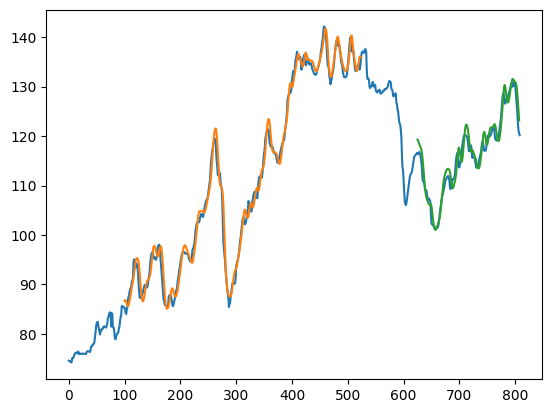

In [38]:
# shift train predictions for plotting
look_back=100 #	Specifies the number of previous time steps (window size) used in training the model.
#This ensures the training predictions align with the original data for proper visualization.

#Creates an array of the same shape as df4 (original dataset) but does not initialize its values.
trainPredictPlot = np.empty_like(df4)

#Fills the entire array with NaN values. 
trainPredictPlot[:, :] = np.nan


# Inserts the training predictions into the trainPredictPlot array, starting at index look_back.
#This aligns the predictions with their corresponding points in the original dataset, considering the look_back offset.
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# similarly for test data
# shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan

#  for the index limits -This ensures the test predictions align correctly with their corresponding points in the original dataset.
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict

# plot baseline and predictions
# to plot actual data and not the scaled one
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

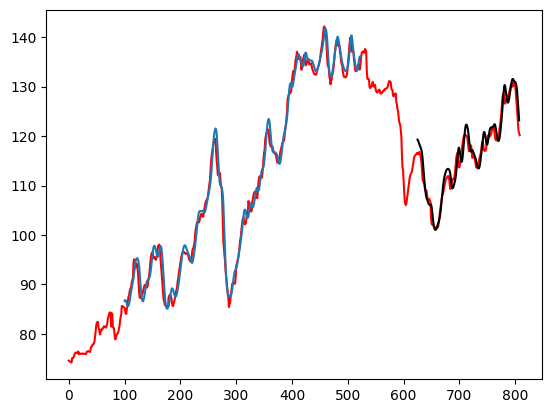

In [46]:
# shift train predictions for plotting
look_back=100 #	Specifies the number of previous time steps (window size) used in training the model.
#This ensures the training predictions align with the original data for proper visualization.

#Creates an array of the same shape as df4 (original dataset) but does not initialize its values.
trainPredictPlot = np.empty_like(df4)

#Fills the entire array with NaN values. 
trainPredictPlot[:, :] = np.nan


# Inserts the training predictions into the trainPredictPlot array, starting at index look_back.
#This aligns the predictions with their corresponding points in the original dataset, considering the look_back offset.
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# similarly for test data
# shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan

#  for the index limits -This ensures the test predictions align correctly with their corresponding points in the original dataset.
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict # spans the orginal dataframe of the last 0.35% of the data set
# , : meaning the entire span



# plot baseline and predictions
# to plot actual data and not the scaled one
plt.plot(scaler.inverse_transform(df4),color='red') # red is the actual data black is test data that is predicted and blue is the train data 
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color='black')
plt.show()

In [34]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [36]:
model.save("petrol_price_prediction.h5")

# ARIMA Model

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

In [49]:
dataframe=pd.read_csv("train_data.csv")
dataframe.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [50]:
dataframe.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
dataframe.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [51]:
dataframe2 = dataframe.dropna()
dataframe3=dataframe2[dataframe2.Petrol<160]
dataframe3.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [52]:
dataframe4=dataframe3.reset_index()['Petrol']
dataframe4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [55]:
model1 = ARIMA(dataframe4.values, order=(5,1,0)) #AutoRegressive Integrated Moving Average

#Specifies the parameters of the ARIMA model:
#		5: The number of autoregressive (AR) terms.
#		1: The degree of differencing (to make the series stationary).
#		0: The number of moving average (MA) terms.



model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30) # instead of predict forecast is used #
        #steps=30:
        #Specifies the number of future time steps to forecast (e.g., 30 steps ahead). 30 days in this case
output1

array([119.80670598, 119.52143353, 119.30634698, 119.14818606,
       119.02925495, 118.93899219, 118.87071729, 118.81917636,
       118.78030457, 118.75097729, 118.72884032, 118.71213023,
       118.6995177 , 118.68999845, 118.68281385, 118.67739123,
       118.67329844, 118.67020937, 118.66787786, 118.66611814,
       118.66478997, 118.66378753, 118.66303093, 118.66245987,
       118.66202887, 118.66170356, 118.66145803, 118.66127272,
       118.66113285, 118.66102728])

# Auto ML - Auto Keras

In [89]:
from sklearn.metrics import mean_squared_error

In [72]:
import tensorflow as tf

In [73]:
import autokeras as ak

In [74]:
pip show autokeras

Name: autokeras
Version: 2.0.0
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /Users/peermohamedarifmohamedalijinna/.pyenv/versions/3.10.10/lib/python3.10/site-packages
Requires: dm-tree, keras, keras-nlp, keras-tuner, packaging
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [79]:
reg = ak.AutoModel(
    inputs=ak.Input(),  # Generic input layer
    outputs=ak.RegressionHead(),  # Regression task
    overwrite=True,
    max_trials=3  # Number of trials to find the best model
)

In [84]:
reg.fit(x=X_train, y=y_train, verbose=0)

2024-12-01 15:25:17.623981: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [85]:
mae, _  = reg.evaluate(X_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)

yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


In [86]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_head_1 (Dense)       │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
yhat_train= reg.predict(X_train)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step


In [88]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [91]:
mean_squared_error(y_test,yhat_test)

np.float64(0.00820629013826983)

In [92]:
mean_squared_error(y_train,yhat_train)

np.float64(0.008991110372441392)